In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\samsung\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\samsung\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\samsung\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data1 = pd.read_csv("file_1-500.csv")
data1 = data1.dropna()

data2 = pd.read_csv("file_501-1000.csv")
data2 = data2.drop(columns='Unnamed: 2')
data2 = data2.dropna()

data3 = pd.read_csv("file_1001-1500.csv")
data3 = data3.dropna()

data4 = pd.read_csv("file_1501-2000.csv")
data4 = data4.drop(columns='Unnamed: 2')
data4 = data4.dropna()

data5 = pd.read_csv("file_2001-2500.csv")
data5 = data5.dropna()

In [3]:
data = pd.concat((data1,data2,data3,data4,data5))
data_size = len(data)

In [4]:
data.reset_index(drop=True)

,file_name,label
0,file_1.jpg,소외
1,file_2.jpg,다이어트
2,file_3.jpg,실패
3,file_4.jpg,긍정
4,file_5.jpg,피자
...,...,...
2450,file_2496.jpg,첫사랑
2451,file_2497.jpg,격분
2452,file_2498.jpg,추방
2453,file_2499.jpg,친구


In [5]:
label = data['label']

In [6]:
!pip install gensim==3.8.0
import gensim

In [7]:
word2vec_model = gensim.models.Word2Vec.load('ko.bin') # https://github.com/Kyubyong/wordvectors -> word2vec model(kor) 


C:\Users\samsung\anaconda3\lib\site-packages\gensim\models\base_any2vec.py:742: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(


In [8]:
embedding_matrix = np.zeros((data_size, 200))
print(np.shape(embedding_matrix))

(2455, 200)


In [9]:
def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

In [10]:
for i, word in enumerate(label):
    vector_value = get_vector(word)
    if vector_value is not None:
        embedding_matrix[i] = vector_value

C:\Users\samsung\AppData\Local\Temp\ipykernel_12988\805029998.py:2: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if word in word2vec_model:
C:\Users\samsung\AppData\Local\Temp\ipykernel_12988\805029998.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  return word2vec_model[word]


In [11]:
embedding_matrix[0]


array([-4.83972400e-01,  7.29992092e-01,  9.05890584e-01, -1.35291755e+00,
       -5.34488618e-01, -2.46234655e-01, -1.42919064e+00,  5.20610988e-01,
       -3.83976012e-01,  1.00803733e+00,  2.83408966e-02,  4.80269760e-01,
       -6.45405054e-01, -1.01187992e+00,  8.56046826e-02,  1.67805719e+00,
        1.65803547e-04,  4.11818087e-01, -6.03896677e-01,  1.48435843e+00,
        1.53078878e+00,  5.96851647e-01,  6.65712535e-01, -8.62430274e-01,
       -9.70557183e-02, -4.65859950e-01, -7.39128217e-02, -4.10421267e-02,
       -5.82414508e-01,  1.38096178e+00, -7.94653520e-02, -9.05619740e-01,
       -9.59751368e-01, -2.31023416e-01,  6.82591438e-01,  1.87213123e-01,
        2.80106097e-01, -4.92035747e-01,  1.58267379e+00,  2.34381819e+00,
        1.29630601e+00,  7.34715879e-01, -2.07634538e-01,  4.85457450e-01,
       -7.05758572e-01,  8.94518569e-03,  1.30207002e+00, -1.89327717e-01,
        4.53920782e-01, -5.20400763e-01,  2.05017850e-02,  2.14054156e-02,
        7.15260148e-01,  

In [12]:
word2vec_model['소외']

C:\Users\samsung\AppData\Local\Temp\ipykernel_12988\2413365752.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  word2vec_model['소외']


array([-4.83972400e-01,  7.29992092e-01,  9.05890584e-01, -1.35291755e+00,
       -5.34488618e-01, -2.46234655e-01, -1.42919064e+00,  5.20610988e-01,
       -3.83976012e-01,  1.00803733e+00,  2.83408966e-02,  4.80269760e-01,
       -6.45405054e-01, -1.01187992e+00,  8.56046826e-02,  1.67805719e+00,
        1.65803547e-04,  4.11818087e-01, -6.03896677e-01,  1.48435843e+00,
        1.53078878e+00,  5.96851647e-01,  6.65712535e-01, -8.62430274e-01,
       -9.70557183e-02, -4.65859950e-01, -7.39128217e-02, -4.10421267e-02,
       -5.82414508e-01,  1.38096178e+00, -7.94653520e-02, -9.05619740e-01,
       -9.59751368e-01, -2.31023416e-01,  6.82591438e-01,  1.87213123e-01,
        2.80106097e-01, -4.92035747e-01,  1.58267379e+00,  2.34381819e+00,
        1.29630601e+00,  7.34715879e-01, -2.07634538e-01,  4.85457450e-01,
       -7.05758572e-01,  8.94518569e-03,  1.30207002e+00, -1.89327717e-01,
        4.53920782e-01, -5.20400763e-01,  2.05017850e-02,  2.14054156e-02,
        7.15260148e-01,  

## MEAN SHIFT

In [14]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

meanshift= MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(embedding_matrix)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241

In [15]:
meanshift= MeanShift(bandwidth=1.0)
cluster_labels = meanshift.fit_predict(embedding_matrix)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241

#### 최적의 bandwidth 찾기

In [16]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(embedding_matrix,quantile=0.25)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 10.346


In [17]:
meanshift= MeanShift(bandwidth=10)
cluster_labels = meanshift.fit_predict(embedding_matrix)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241

In [21]:
data['meanshift_label']  = cluster_labels
data.tail

<bound method NDFrame.tail of          file_name label  meanshift_label
0       file_1.jpg    소외                0
1       file_2.jpg  다이어트                0
2       file_3.jpg    실패              312
3       file_4.jpg    긍정                0
4       file_5.jpg    피자                0
..             ...   ...              ...
495  file_2496.jpg   첫사랑                0
496  file_2497.jpg    격분                0
497  file_2498.jpg    추방              123
498  file_2499.jpg    친구               28
499  file_2500.jpg    포기               30

[2455 rows x 3 columns]>

## PCA 적용 후


In [22]:
!pip install scikit-learn
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)
PCA_result = pca.fit_transform(embedding_matrix)

PCA_result = pd.DataFrame(PCA_result)
PCA_result['X'] = PCA_result.iloc[0: ,0]
PCA_result['Y'] = PCA_result.iloc[0:, 1]
PCA_final = PCA_result[['X', 'Y']]
PCA_final.head()

,X,Y
0,0.820741,-2.103317
1,-3.056455,-0.119027
2,4.329550,-5.089721
3,0.286527,-1.943230
4,-4.980274,1.726962


In [34]:
bandwidth = estimate_bandwidth(PCA_final,quantile=0.25)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 30.361


In [31]:
meanshift= MeanShift(bandwidth=3.4)
cluster_labels = meanshift.fit_predict(PCA_final)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241

             X         Y  meanshift_label
0     0.820741 -2.103317               64
1    -3.056455 -0.119027               67
2     4.329550 -5.089721              212
3     0.286527 -1.943230               72
4    -4.980274  1.726962              103
...        ...       ...              ...
2450 -2.373950  0.561578              196
2451  1.361248 -1.460700              116
2452  2.982077 -4.665356              174
2453  1.266099  8.248471               62
2454  3.748985 -5.593308               27

[2455 rows x 3 columns]


C:\Users\samsung\AppData\Local\Temp\ipykernel_12988\1472646510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCA_final['meanshift_label']  = cluster_labels
C:\Users\samsung\AppData\Local\Temp\ipykernel_12988\1472646510.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=label_cluster['X'], y=label_cluster['Y'], edgecolor='k',
C:\Users\samsung\AppData\Local\Temp\ipykernel_12988\1472646510.py:17: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  p

IndexError: list index out of range

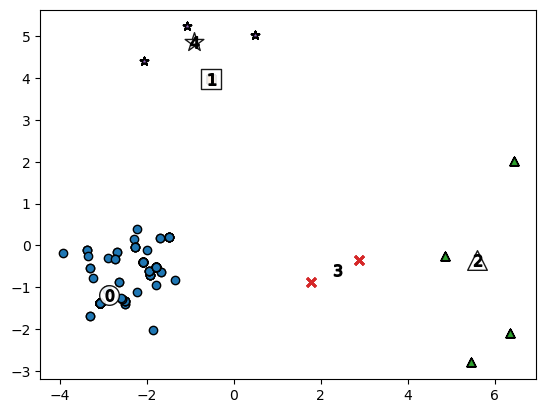

In [33]:
import matplotlib.pyplot as plt

PCA_final['meanshift_label']  = cluster_labels
print(PCA_final)
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = PCA_final[PCA_final['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['X'], y=label_cluster['Y'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()